<a href="https://colab.research.google.com/github/sabelle/Arctic-Atmospheric-Predictions/blob/main/final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS441 Final Project - Antarctica Atmospheric Predictions for Ascent and Descent of Aircraft

**Authors: Sabelle Huang, Jenny Chung, Colin Cai, Henry Murdock**



In [1]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

drive.mount('/content/drive')
datadir = "/content/drive/MyDrive/CS441/cs441_final/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Data in csv has been cleaned to map different column names that correspond to
# same attributes that we care about.
def load_at_data():
  return pd.read_csv(datadir + 'aligned_data.csv.gz', compression='gzip')[::50]

In [3]:
arctic_df = load_at_data()

In [4]:
arctic_df.keys()

Index(['Unnamed: 0', 'UTC', 'Latitude', 'Longitude', 'GPS_Altitude',
       'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed',
       'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading',
       'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle',
       'Static_Air_Temp', 'Dew_Point', 'Total_Air_Temp', 'IR_Surf_Temp',
       'SAT_COMPUTED', 'Static_Pressure', 'Cabin_Pressure', 'Cabin_Altitude',
       'Wind_Speed', 'Wind_Direction', 'MIX_RATIO', 'PART_PRES_H2O',
       'Part_Press_Ice', 'REL_HUM_H2O', 'REL_HUM_ICE', 'SAT_VP_H2O',
       'SAT_VP_ICE', 'SUN_ELEV_EARTH', 'SUN_ELEV_PLANE', 'SUN_AZM_EARTH',
       'SUN_AZM_PLANE', 'Solar_Zenith_Angle', 'year', 'Radar_Altitude',
       'Dew_Point_3-Stage', 'TAT_Aircraft', 'TAT_Experimenter',
       'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth',
       'Mixing_Ratio', 'Part_Pressure_H2O', 'Part_Pressure_Ice',
       'H2O_Sat_VP_Water', 'H2O_Sat_VP_Ice', 'Rel_Humidity_H2O',
       'Rel_Humidity_Ic

## Data Cleaning & Analysis

In [5]:
# These attributes were not consistently recorded
drop_keysb = ["Unnamed: 0", "Dew_Point_3-Stage", "TAT_Experimenter",
              "TAT_Aircraft", "TAT_Experimenter",
              "Mixing_Ratio", "H2O_Sat_VP_Water",
              "H2O_Sat_VP_Ice", "Aircraft_Sun_Elevation",
              "Sun_Azimuth", "Aircraft_Sun_Azimuth",
              "Rel_Humidity_H2O", "Rel_Humidity_Ice", "MIX_RATIO", "SAT_VP_H2O",
              "SAT_VP_ICE", "SUN_ELEV_EARTH",
              "SUN_ELEV_PLANE", "SUN_AZM_EARTH", "SUN_AZM_PLANE",
              "Rel_Humidity_H2O", "Rel_Humidity_Ice", "Part_Press__Water_Vapor",
              "Sat_Vapor_Press_H2O", "Sat_Vapor_Press_Ice", "Relative_Humidity",
              "Part_Press__Water_Vap_H2O", "Part_Press__Water_Vap_Ice",
              "Radar_Altitude", "Part_Pressure_H2O", "Part_Pressure_Ice",
              "Relative_Humidity_H2O", "Relative_Humidity_Ice", "REL_HUM_H2O",
              "REL_HUM_ICE", "PART_PRES_H2O", "Part_Press_Ice", "SAT_COMPUTED",
              "Total_Air_Temp", "Dew_Point", "IR_Surf_Temp", "Cabin_Altitude",
              "Mach_Number"
]

cleaned_df = arctic_df.drop(columns=drop_keysb)
cleaned_df = cleaned_df.dropna()

# No wind data in a few examples
cleaned_df = cleaned_df[cleaned_df["Wind_Speed"] != -99999.0]
cleaned_df = cleaned_df[cleaned_df["Wind_Speed"] != -9999.0]
cleaned_df = cleaned_df[cleaned_df["GPS_Altitude"] != -99999.0]
cleaned_df = cleaned_df[cleaned_df["GPS_Altitude"] != -9999.0]
cleaned_df = cleaned_df[cleaned_df["Pressure_Altitude"] != -99999.0]
cleaned_df = cleaned_df[cleaned_df["Pressure_Altitude"] != -9999.0]
cleaned_df = cleaned_df[cleaned_df["Vertical_Speed"] != -99999.0]
cleaned_df = cleaned_df[cleaned_df["Vertical_Speed"] != -9999.0]
cleaned_df = cleaned_df[cleaned_df["Wind_Direction"] != -99999.0]
cleaned_df = cleaned_df[cleaned_df["Wind_Direction"] != -9999.0]
cleaned_df = cleaned_df[cleaned_df["Solar_Zenith_Angle"] != -99999.0]
cleaned_df = cleaned_df[cleaned_df["Solar_Zenith_Angle"] != -9999.0]

print("Total Cleaned Data Points: ", len(cleaned_df))

Total Cleaned Data Points:  64309


In [6]:
# Data sampled every 50s
cleaned_df.head()

,UTC,Latitude,Longitude,GPS_Altitude,Pressure_Altitude,Ground_Speed,True_Air_Speed,Indicated_Air_Speed,Vertical_Speed,True_Heading,...,Drift_Angle,Pitch_Angle,Roll_Angle,Static_Air_Temp,Static_Pressure,Cabin_Pressure,Wind_Speed,Wind_Direction,Solar_Zenith_Angle,year
50,43190.0,-53.001137,-70.878468,131.5,1047.0,81.5,91.6,178.4,434.0,-88.6,...,-2.9,10.2,4.6,4.5,975.495,980.257,7.7,-69.6,66.0,2009
100,43240.0,-53.020878,-70.933228,550.1,2510.0,108.4,111.0,211.1,292.6,-147.7,...,-7.8,6.9,-12.1,-0.2,924.655,975.456,14.9,-70.0,65.9,2009
150,43290.0,-53.077698,-70.938892,813.6,3433.0,141.1,135.4,255.6,282.9,-173.7,...,-6.6,7.5,2.9,-2.5,893.700,977.206,17.2,-65.4,65.8,2009
200,43340.0,-53.141727,-70.940437,1305.4,5071.0,142.2,139.3,256.0,726.6,-172.4,...,-7.8,8.8,-1.3,-4.0,840.833,982.861,20.1,-73.8,65.7,2009
250,43390.0,-53.203697,-70.940437,1926.6,7224.0,134.1,135.8,241.6,702.3,-167.8,...,-11.4,9.3,5.0,-8.0,775.225,979.443,26.2,-88.6,65.6,2009


## Visualize where data is geographically

In [7]:
!pip install basemap
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Circle

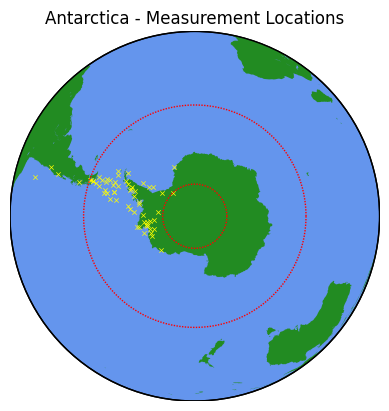

In [8]:
# Visualize Antarctica data: Lats: 90 S - 53 S, Longs: 180 W - 180 E
map = Basemap(projection='ortho',lat_0=-90,lon_0=0,resolution='l')
map.fillcontinents(color='forestgreen', lake_color="cornflowerblue")
map.drawparallels([-53.0], color="r")
map.drawmapboundary(fill_color='cornflowerblue')

x, y = map(cleaned_df['Longitude'][::1000].values, cleaned_df['Latitude'][::1000].values)

# Plot the points
map.scatter(x, y, s=10, c='yellow', marker='x', linewidth=0.5)

plt.title("Antarctica - Measurement Locations")
plt.show()

## Visualize Altitude Distributions

(array([19692.,  5817.,  1362.,   930.,  1281.,  1412.,  2175., 13425.,
        13569.,  4646.]),
 array([-8.5800000e+00,  1.2771280e+03,  2.5628360e+03,  3.8485440e+03,
         5.1342520e+03,  6.4199600e+03,  7.7056680e+03,  8.9913760e+03,
         1.0277084e+04,  1.1562792e+04,  1.2848500e+04]),
 <BarContainer object of 10 artists>)

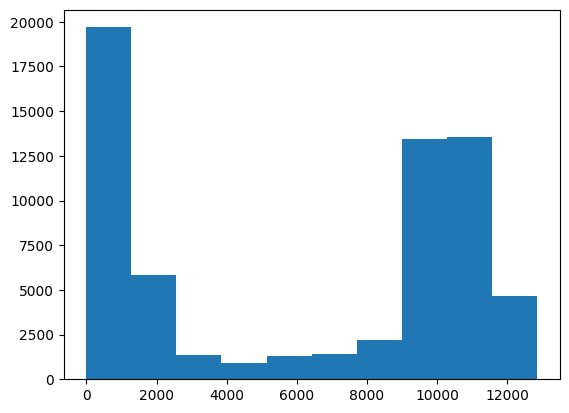

In [9]:
plt.hist(cleaned_df["GPS_Altitude"])

(array([16269.,  8249.,  2019.,   956.,  1196.,  1020.,  1413.,  2660.,
        17676., 12851.]),
 array([ -110. ,  4017.1,  8144.2, 12271.3, 16398.4, 20525.5, 24652.6,
        28779.7, 32906.8, 37033.9, 41161. ]),
 <BarContainer object of 10 artists>)

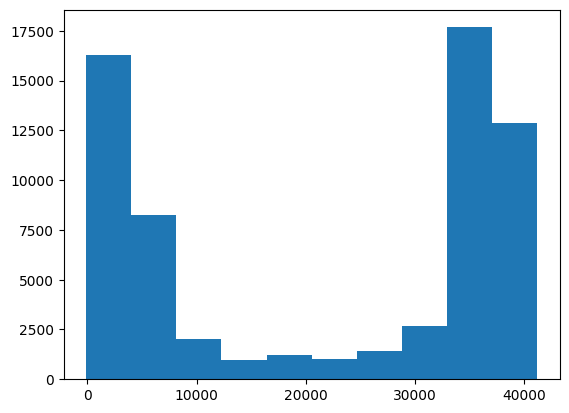

In [10]:
plt.hist(cleaned_df["Pressure_Altitude"])

(array([ 1932., 15901., 12947.,  4393.,  2420., 15710.,  8085.,  2021.,
          519.,   381.]),
 array([-80.5  , -69.125, -57.75 , -46.375, -35.   , -23.625, -12.25 ,
         -0.875,  10.5  ,  21.875,  33.25 ]),
 <BarContainer object of 10 artists>)

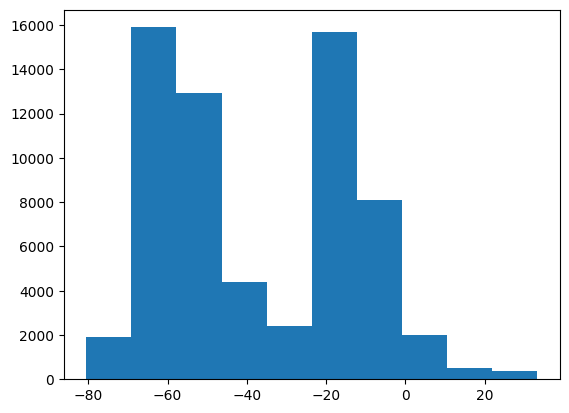

In [11]:
plt.hist(cleaned_df["Static_Air_Temp"])

(array([18657., 17384., 10630.,  7884.,  4445.,  2855.,  1438.,   744.,
          209.,    63.]),
 array([ 0.     ,  8.05105, 16.1021 , 24.15315, 32.2042 , 40.25525,
        48.3063 , 56.35735, 64.4084 , 72.45945, 80.5105 ]),
 <BarContainer object of 10 artists>)

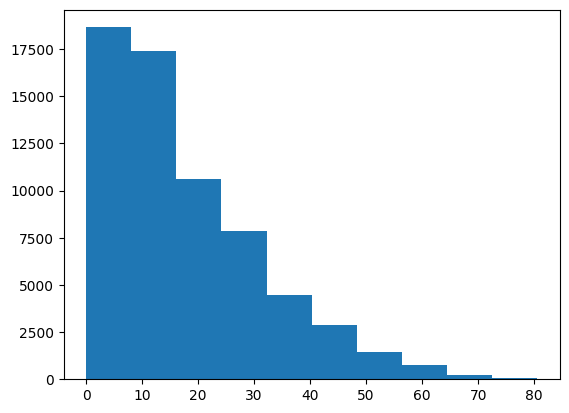

In [12]:
plt.hist(cleaned_df["Wind_Speed"])

(array([ 5425.,  8955.,  3931.,  3498.,  7007.,  7406.,  4892.,  7216.,
        12162.,  3817.]),
 array([-180., -126.,  -72.,  -18.,   36.,   90.,  144.,  198.,  252.,
         306.,  360.]),
 <BarContainer object of 10 artists>)

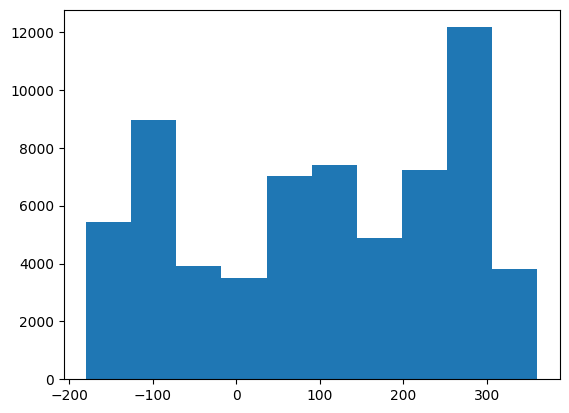

In [13]:
plt.hist(cleaned_df["Wind_Direction"])

(array([  756.,  1582.,  8208., 32688., 15152.,  3879.,   691.,   304.,
          417.,   632.]),
 array([  3.85256 ,  20.295504,  36.738448,  53.181392,  69.624336,
         86.06728 , 102.510224, 118.953168, 135.396112, 151.839056,
        168.282   ]),
 <BarContainer object of 10 artists>)

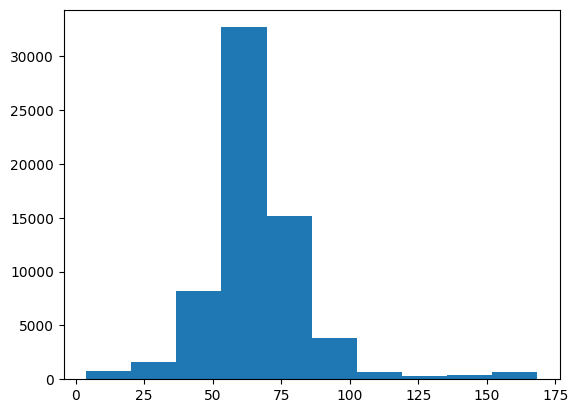

In [14]:
plt.hist(cleaned_df["Solar_Zenith_Angle"])

(array([1.1000e+01, 3.7100e+02, 1.5220e+03, 6.0711e+04, 1.4940e+03,
        1.8900e+02, 9.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1667.9 , -1186.07,  -704.24,  -222.41,   259.42,   741.25,
         1223.08,  1704.91,  2186.74,  2668.57,  3150.4 ]),
 <BarContainer object of 10 artists>)

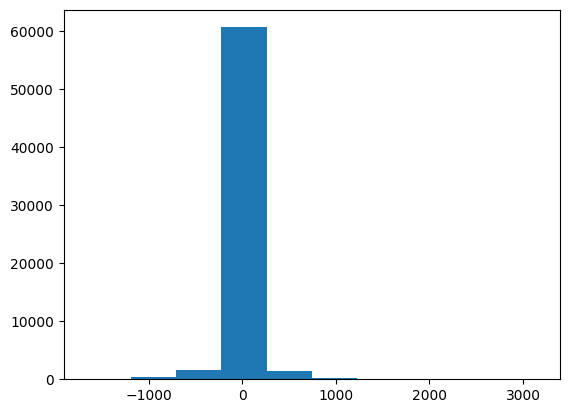

In [15]:
plt.hist(cleaned_df["Vertical_Speed"])

## Training Preparation

In [23]:
cleaned_df.keys()

Index(['UTC', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude',
       'Ground_Speed', 'True_Air_Speed', 'Indicated_Air_Speed',
       'Vertical_Speed', 'True_Heading', 'Track_Angle', 'Drift_Angle',
       'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Static_Pressure',
       'Cabin_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle',
       'year'],
      dtype='object')

In [24]:
X_t = cleaned_df[["Latitude", "Longitude", "GPS_Altitude", "Pressure_Altitude",
                "Ground_Speed", "True_Air_Speed", "Indicated_Air_Speed",
                "Vertical_Speed", "True_Heading", "Track_Angle", "Drift_Angle",
                "Pitch_Angle", "Roll_Angle", "Static_Pressure",
                "Cabin_Pressure", "Solar_Zenith_Angle"]]

y_t = cleaned_df["Static_Air_Temp"].T

In [25]:
X_t.shape, y_t.shape

((64309, 16), (64309,))

In [26]:
import torch
from torch.utils.data import Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler

class AltitudeDataset(Dataset):
    def __init__(self, csv_path, feature_scaler=None, target_scaler=None, fit_scalers=False):
        df = pd.read_csv(csv_path, compression='gzip')

        # Drop unused fields
        drop_keys = [
            "Unnamed: 0", "Dew_Point_3-Stage", "TAT_Experimenter", "TAT_Aircraft",
            "Mixing_Ratio", "H2O_Sat_VP_Water", "H2O_Sat_VP_Ice", "Aircraft_Sun_Elevation",
            "Sun_Azimuth", "Aircraft_Sun_Azimuth", "Rel_Humidity_H2O", "Rel_Humidity_Ice",
            "MIX_RATIO", "SAT_VP_H2O", "SAT_VP_ICE", "SUN_ELEV_EARTH", "SUN_ELEV_PLANE",
            "SUN_AZM_EARTH", "SUN_AZM_PLANE", "Part_Press__Water_Vapor",
            "Sat_Vapor_Press_H2O", "Sat_Vapor_Press_Ice", "Relative_Humidity",
            "Part_Press__Water_Vap_H2O", "Part_Press__Water_Vap_Ice",
            "Radar_Altitude", "Part_Pressure_H2O", "Part_Pressure_Ice",
            "Relative_Humidity_H2O", "Relative_Humidity_Ice",
            "REL_HUM_H2O", "REL_HUM_ICE", "PART_PRES_H2O",
            "Part_Press_Ice", "SAT_COMPUTED", "Total_Air_Temp", "Dew_Point",
            "Cabin_Altitude", "Mach_Number"
        ]
        df = df.drop(columns=[c for c in drop_keys if c in df.columns], errors="ignore")

        # Drop NaN and invalid sentinel values *in one pass*
        bad_mask = (df == -99999) | (df == -9999)
        df = df[~bad_mask.any(axis=1)].dropna()

        # Keep only the needed features
        feature_cols = ["Latitude", "Longitude", "IR_Surf_Temp", "Solar_Zenith_Angle", "Pressure_Altitude"]
        target_cols  = ["Static_Air_Temp", "Wind_Speed"]  # wind direction REMOVED

        X = df[feature_cols].values.astype(np.float32)
        y = df[target_cols].values.astype(np.float32)

        # Fit scalers only ONCE using training data
        if fit_scalers:
            feature_scaler = StandardScaler().fit(X)
            target_scaler = StandardScaler().fit(y)

        self.X = feature_scaler.transform(X)
        self.y = target_scaler.transform(y)

        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return (
            torch.tensor(self.X[idx], dtype=torch.float32),
            torch.tensor(self.y[idx], dtype=torch.float32)
        )

Data Exploration:

*   Random Forest
*   Support Vector Machine
*   Linear Regression
*   Dense Network



# Linear Regression

In [69]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert to numpy arrays
X = X_t.values
y = y_t.values

# Split: 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Normalize features
scaler = StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)



In [70]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_s, y_train)


LinearRegression()

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(model, X, y, name):
    pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, pred))
    mae  = mean_absolute_error(y, pred)
    r2   = r2_score(y, pred)

    print(f"{name}:")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  MAE  = {mae:.4f}")
    print(f"  R^2  = {r2:.4f}\n")

    return pred

print("=== Linear Regression Results ===\n")
pred_train = evaluate(linreg, X_train_s, y_train, "Train")
pred_val   = evaluate(linreg, X_val_s,   y_val,   "Validation")
pred_test  = evaluate(linreg, X_test_s,  y_test,  "Test")


=== Linear Regression Results ===

Train:
  RMSE = 8.3974
  MAE  = 5.9117
  R^2  = 0.6547

Validation:
  RMSE = 8.4566
  MAE  = 5.9447
  R^2  = 0.6576

Test:
  RMSE = 8.4307
  MAE  = 5.9015
  R^2  = 0.6562



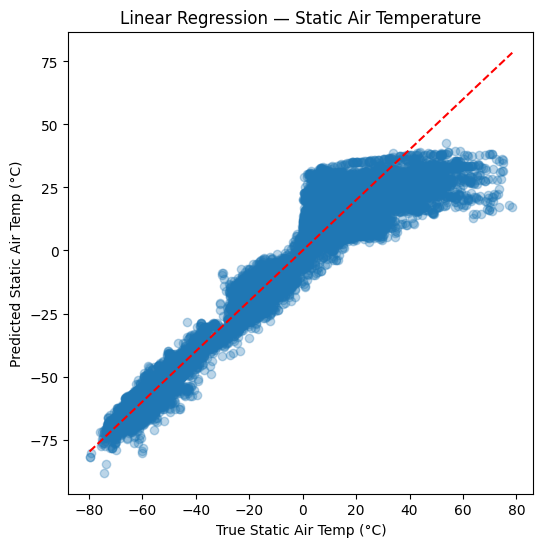

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_test, alpha=0.3)
plt.xlabel("True Static Air Temp (°C)")
plt.ylabel("Predicted Static Air Temp (°C)")
plt.title("Linear Regression — Static Air Temperature")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()


### Predicting Wind Speed

In [73]:
X_t = cleaned_df[[
    "Latitude", "Longitude", "GPS_Altitude", "Pressure_Altitude",
    "Ground_Speed", "True_Air_Speed", "Indicated_Air_Speed",
    "Vertical_Speed", "True_Heading", "Track_Angle", "Drift_Angle",
    "Pitch_Angle", "Roll_Angle", "Static_Pressure",
    "Cabin_Pressure", "Solar_Zenith_Angle",
]]

# Wind target
y_wind = cleaned_df["Wind_Speed"].values

# Convert X_t to numpy
X = X_t.values

# Train/val/test split
X_train_w, X_temp_w, y_train_w, y_temp_w = train_test_split(
    X, y_wind, test_size=0.40, random_state=42
)
X_val_w, X_test_w, y_val_w, y_test_w = train_test_split(
    X_temp_w, y_temp_w, test_size=0.50, random_state=42
)


scaler_wind = StandardScaler().fit(X_train_w)

X_train_w_s = scaler_wind.transform(X_train_w)
X_val_w_s   = scaler_wind.transform(X_val_w)
X_test_w_s  = scaler_wind.transform(X_test_w)

# Train model
wind_reg = LinearRegression()
wind_reg.fit(X_train_w_s, y_train_w)

print("\n=== Linear Regression Results — Wind Speed ===\n")
pred_train_w = evaluate(wind_reg, X_train_w_s, y_train_w, "Train")
pred_val_w   = evaluate(wind_reg, X_val_w_s,   y_val_w,   "Validation")
pred_test_w  = evaluate(wind_reg, X_test_w_s,  y_test_w,  "Test")



=== Linear Regression Results — Wind Speed ===

Train:
  RMSE = 11.0987
  MAE  = 8.5136
  R^2  = 0.3410

Validation:
  RMSE = 11.1679
  MAE  = 8.5440
  R^2  = 0.3480

Test:
  RMSE = 11.1476
  MAE  = 8.5028
  R^2  = 0.3440



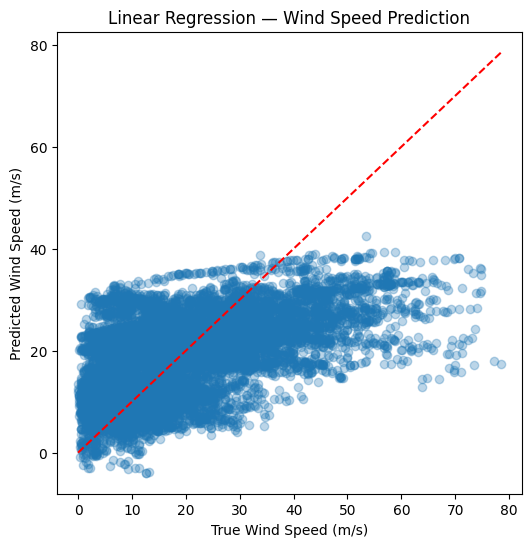

In [74]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_w, pred_test_w, alpha=0.3)
plt.xlabel("True Wind Speed (m/s)")
plt.ylabel("Predicted Wind Speed (m/s)")
plt.title("Linear Regression — Wind Speed Prediction")

plt.plot(
    [y_test_w.min(), y_test_w.max()],
    [y_test_w.min(), y_test_w.max()],
    'r--'
)

plt.show()


# Random Forest

In [89]:
X_t = cleaned_df[["Latitude", "Longitude", "GPS_Altitude", "Pressure_Altitude",
                "Ground_Speed", "True_Air_Speed", "Indicated_Air_Speed",
                "Vertical_Speed", "True_Heading", "Track_Angle", "Drift_Angle",
                "Pitch_Angle", "Roll_Angle", "Static_Pressure",
                "Cabin_Pressure", "Solar_Zenith_Angle"]]

y_t = cleaned_df[["Static_Air_Temp", "Wind_Speed"]]

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = ["Static_Air_Temp", "Wind_Speed"]
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=0)
model = RandomForestRegressor(random_state=42, n_estimators=100)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)
rmse = np.sqrt(np.mean((y_preds-y_test)**2))

In [91]:
print("=== Random Forest Results ===\n")
for i, target in enumerate(y_t.columns):
  print(f"---{target}---")
  print(f"Test RMSE: {root_mean_squared_error(y_test.iloc[:, i], y_preds[:, i]):.4f}")
  print(f"Test R^2: {r2_score(y_test.iloc[:, i], y_preds[:, i]):.4f}")

=== Random Forest Results ===

---Static_Air_Temp---
Test RMSE: 1.6156
Test R^2: 0.9954
---Wind_Speed---
Test RMSE: 1.8588
Test R^2: 0.9819


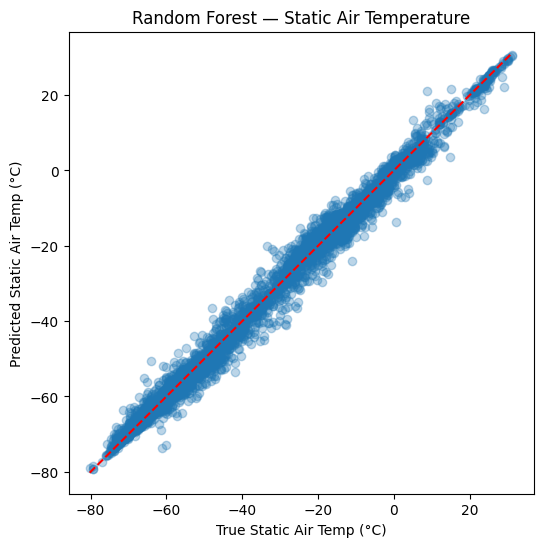

In [81]:
import matplotlib.pyplot as plt

yp_temps = y_preds[:, 0]
yt_temps = y_test.to_numpy()[:, 0]
yp_ws = y_preds[:, 1]
yt_ws = y_test.to_numpy()[:, 1]

plt.figure(figsize=(6,6))
plt.scatter(yt_temps, yp_temps, alpha=0.3)
plt.xlabel("True Static Air Temp (°C)")
plt.ylabel("Predicted Static Air Temp (°C)")
plt.title("Random Forest — Static Air Temperature")
plt.plot([yt_temps.min(), yt_temps.max()],
         [yt_temps.min(), yt_temps.max()], 'r--')  # ideal line
plt.show()

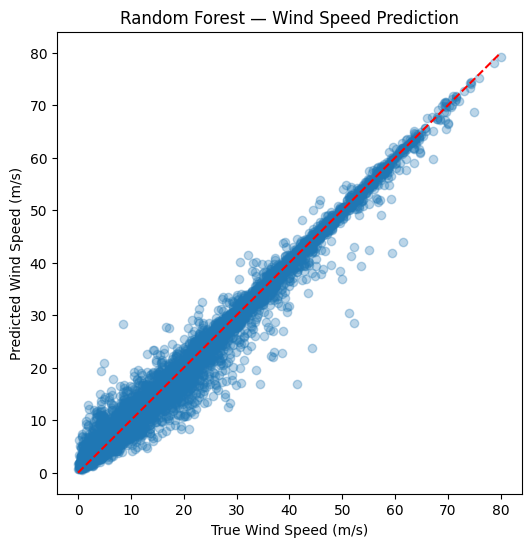

In [82]:
plt.figure(figsize=(6,6))
plt.scatter(yt_ws, yp_ws, alpha=0.3)
plt.xlabel("True Wind Speed (m/s)")
plt.ylabel("Predicted Wind Speed (m/s)")
plt.title("Random Forest — Wind Speed Prediction")

plt.plot(
    [yt_ws.min(), yt_ws.max()],
    [yt_ws.min(), yt_ws.max()],
    'r--'
)

plt.show()

## Support Vector Machine (SVM)

In this approach we train an SVM to predict Wind Speed and Air Temperature.

In [50]:
from sklearn.model_selection import train_test_split

X_t = cleaned_df[["Latitude", "Longitude", "GPS_Altitude", "Pressure_Altitude",
                "Ground_Speed", "True_Air_Speed", "Indicated_Air_Speed",
                "Vertical_Speed", "True_Heading", "Track_Angle", "Drift_Angle",
                "Pitch_Angle", "Roll_Angle", "Static_Pressure",
                "Cabin_Pressure", "Solar_Zenith_Angle"]]

y_t = cleaned_df[["Static_Air_Temp", "Wind_Speed"]]

# Train, validation, test split
non_val_x, X_val, non_val_y, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(non_val_x, non_val_y, test_size=1./8,
                                   random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

multi_svr_pipeline = Pipeline([
    ('scaler', StandardScaler()), # standardize features
    ('svr', MultiOutputRegressor(SVR(kernel='rbf', C=10, epsilon=0.1)))
])
multi_svr_pipeline.fit(X_train, y_train)

=== SVM Results ===

---Static_Air_Temp---
Train RMSE: 1.3826
Validation RMSE: 1.6241
Train R^2: 0.9966
Validation R^2: 0.9953
---Wind_Speed---
Train RMSE: 3.1187
Validation RMSE: 3.1970
Train R^2: 0.9482
Validation R^2: 0.9469


In [53]:
# Predictions on train and validation set
y_pred_val = multi_svr_pipeline.predict(X_val)
y_pred_test = multi_svr_pipeline.predict(X_test)

print("=== SVM Results ===\n")
for i, target in enumerate(y_t.columns):
  print(f"---{target}---")
  print(f"Validation RMSE: {root_mean_squared_error(y_val.iloc[:, i], y_pred_val[:, i]):.4f}")
  print(f"Test RMSE: {root_mean_squared_error(y_test.iloc[:, i], y_pred_test[:, i]):.4f}")
  print(f"Validation R^2: {r2_score(y_val.iloc[:, i], y_pred_val[:, i]):.4f}")
  print(f"Test R^2: {r2_score(y_test.iloc[:, i], y_pred_test[:, i]):.4f}")

=== SVM Results ===

---Static_Air_Temp---
Validation RMSE: 1.6241
Test RMSE: 1.4819
Validation R^2: 0.9953
Test R^2: 0.9961
---Wind_Speed---
Validation RMSE: 3.1970
Test RMSE: 3.3071
Validation R^2: 0.9469
Test R^2: 0.9407


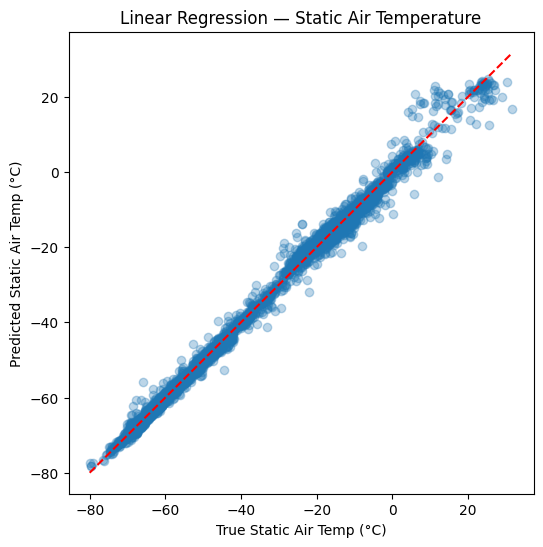

In [54]:
import matplotlib.pyplot as plt

yp_temps = y_pred_test[:, 0]
yt_temps = y_test.to_numpy()[:, 0]
yp_ws = y_pred_test[:, 1]
yt_ws = y_test.to_numpy()[:, 1]

plt.figure(figsize=(6,6))
plt.scatter(yt_temps, yp_temps, alpha=0.3)
plt.xlabel("True Static Air Temp (°C)")
plt.ylabel("Predicted Static Air Temp (°C)")
plt.title("Linear Regression — Static Air Temperature")
plt.plot([yt_temps.min(), yt_temps.max()],
         [yt_temps.min(), yt_temps.max()], 'r--')  # ideal line
plt.show()

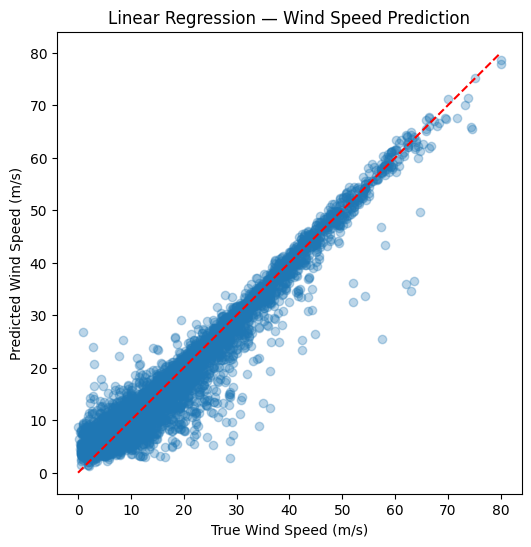

In [55]:
plt.figure(figsize=(6,6))
plt.scatter(yt_ws, yp_ws, alpha=0.3)
plt.xlabel("True Wind Speed (m/s)")
plt.ylabel("Predicted Wind Speed (m/s)")
plt.title("Linear Regression — Wind Speed Prediction")

plt.plot(
    [yt_ws.min(), yt_ws.max()],
    [yt_ws.min(), yt_ws.max()],
    'r--'
)

plt.show()

## Dense Network
In this approach we train an MLP. We need to select and structure our data carefully because we are doing forecasting. The simplest option is to use data attributes that are constant for any altitude that way we can train the network we can use the observed data but we don't have to structure the data such that we can j

In [56]:
import torch
import torch.nn as nn

class AltitudeNet(nn.Module):
    def __init__(self, in_dim, out_dim, hidden_dim=256):
        super().__init__()

        self.mlp = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )

    def forward(self, x):
        """
        x: (batch, input_dim)
        returns: predictions (batch, out_dim)
        """
        return self.mlp(x)



In [57]:
ads = AltitudeDataset(datadir + 'aligned_data.csv.gz', fit_scalers=True)
device = 'cuda'

len(ads)

3119844

In [58]:
def display_error_curves(training_losses, validation_losses):
  """
  Plots the training and validation loss curves
  training_losses and validation_losses should be lists or arrays of the same length
  """
  num_epochs = len(training_losses)

  plt.plot(range(num_epochs), training_losses, label="Training Loss")
  plt.plot(range(num_epochs), validation_losses, label="Validation Loss")

  # Add in a title and axes labels
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  # Display the plot
  plt.legend(loc='best')
  plt.show()

In [59]:
def train_MLP(train_loader, val_loader, feature_scaler, target_scaler,
              lr=1e-3, num_epochs=20, device="cuda"):
    model = AltitudeNet(5, 2, hidden_dim=256).to(device)
    loss_fn = torch.nn.MSELoss()
    opt = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        n = 0

        for X, y in train_loader:
            X, y = X.to(device), y.to(device)

            opt.zero_grad()
            pred = model(X)
            loss = loss_fn(pred, y)
            loss.backward()
            opt.step()

            total_loss += loss.item() * X.size(0)
            n += X.size(0)

        train_losses.append(total_loss / n)

        # Validation
        model.eval()
        total_loss = 0
        n = 0
        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                pred = model(X)
                loss = loss_fn(pred, y)
                total_loss += loss.item() * X.size(0)
                n += X.size(0)

        val_losses.append(total_loss / n)

        print(f"Epoch {epoch+1}/{num_epochs} | Train: {train_losses[-1]:.4f} | Val: {val_losses[-1]:.4f}")


    return model, train_losses, val_losses


def evaluate_MLP(model, loader, target_scaler, device="cuda"):
    model.eval()
    loss_fn = torch.nn.MSELoss()
    total_loss = 0
    n = 0

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)

            # unscale predictions + targets
            pred_unscaled = target_scaler.inverse_transform(pred.cpu().numpy())
            y_unscaled    = target_scaler.inverse_transform(y.cpu().numpy())

            pred_unscaled = torch.tensor(pred_unscaled, dtype=torch.float32)
            y_unscaled    = torch.tensor(y_unscaled, dtype=torch.float32)

            loss = loss_fn(pred_unscaled, y_unscaled)

            total_loss += loss.item() * X.size(0)
            n += X.size(0)

    return total_loss / n


In [60]:
train_sz = int(0.6 * len(ads))
val_sz = int(0.2 * len(ads))
test_sz = len(ads) - train_sz - val_sz

train_ds, val_ds, test_ds = torch.utils.data.random_split(
    ads, [train_sz, val_sz, test_sz],
    generator=torch.Generator().manual_seed(42) # For reproducibility
)

train_loader = torch.utils.data.DataLoader(
    train_ds,
    batch_size=256,
    shuffle=True,
    num_workers=2
)

val_loader = torch.utils.data.DataLoader(
    val_ds,
    batch_size=256,
    shuffle=True,
    num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_ds,
    batch_size=256,
    shuffle=True,
    num_workers=2
)

In [61]:
mlp_lr3 = train_MLP(train_loader, val_loader, ads.feature_scaler,
                    ads.target_scaler, lr=1e-3, num_epochs=100)
mlp_lr5 = train_MLP(train_loader, val_loader, ads.feature_scaler,
                    ads.target_scaler, lr=0.5e-3, num_epochs=100)
mlp_lr4 = train_MLP(train_loader, val_loader, ads.feature_scaler,
                    ads.target_scaler, lr=1e-4, num_epochs=100)

torch.save(mlp_lr3[0].state_dict(), datadir + "mlp_lr3v2.pth")
torch.save(mlp_lr5[0].state_dict(), datadir + "mlp_lr5v2.pth")
torch.save(mlp_lr4[0].state_dict(), datadir + "mlp_lr4v2.pth")


Epoch 1/100 | Train: 0.2012 | Val: 0.1584
Epoch 2/100 | Train: 0.1501 | Val: 0.1225
Epoch 3/100 | Train: 0.1102 | Val: 0.0994
Epoch 4/100 | Train: 0.0943 | Val: 0.0881
Epoch 5/100 | Train: 0.0770 | Val: 0.0756
Epoch 6/100 | Train: 0.0685 | Val: 0.0685
Epoch 7/100 | Train: 0.0620 | Val: 0.0596
Epoch 8/100 | Train: 0.0574 | Val: 0.0547
Epoch 9/100 | Train: 0.0578 | Val: 0.0534
Epoch 10/100 | Train: 0.0524 | Val: 0.0514
Epoch 11/100 | Train: 0.0496 | Val: 0.0513
Epoch 12/100 | Train: 0.0471 | Val: 0.0442
Epoch 13/100 | Train: 0.0454 | Val: 0.0508
Epoch 14/100 | Train: 0.0440 | Val: 0.0464
Epoch 15/100 | Train: 0.0428 | Val: 0.0435
Epoch 16/100 | Train: 0.0417 | Val: 0.0425
Epoch 17/100 | Train: 0.0407 | Val: 0.0444
Epoch 18/100 | Train: 0.0401 | Val: 0.0429
Epoch 19/100 | Train: 0.0392 | Val: 0.0437
Epoch 20/100 | Train: 0.0384 | Val: 0.0425
Epoch 21/100 | Train: 0.0378 | Val: 0.0387
Epoch 22/100 | Train: 0.0376 | Val: 0.0403
Epoch 23/100 | Train: 0.0367 | Val: 0.0352
Epoch 24/100 | Train

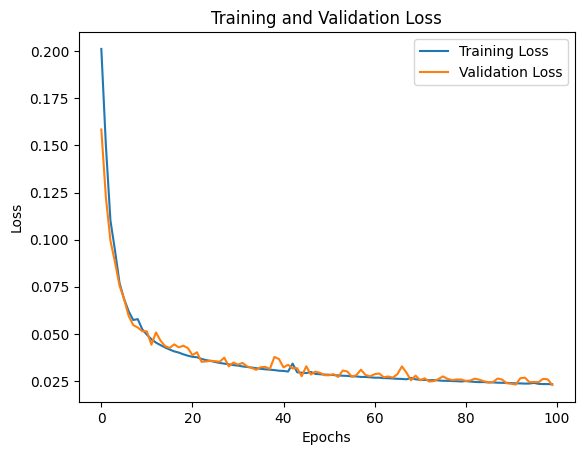

In [62]:
display_error_curves(mlp_lr3[1], mlp_lr3[2])

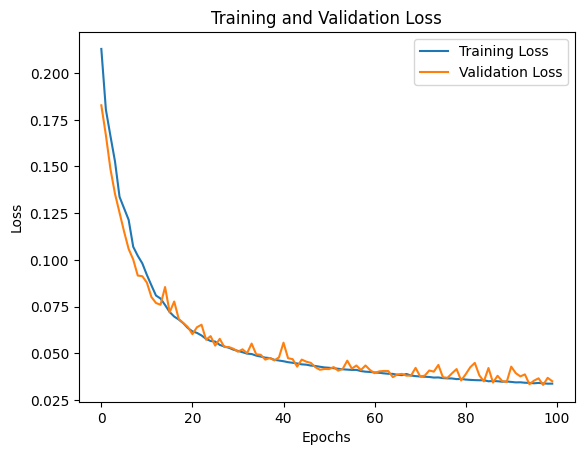

In [63]:
display_error_curves(mlp_lr5[1], mlp_lr5[2])

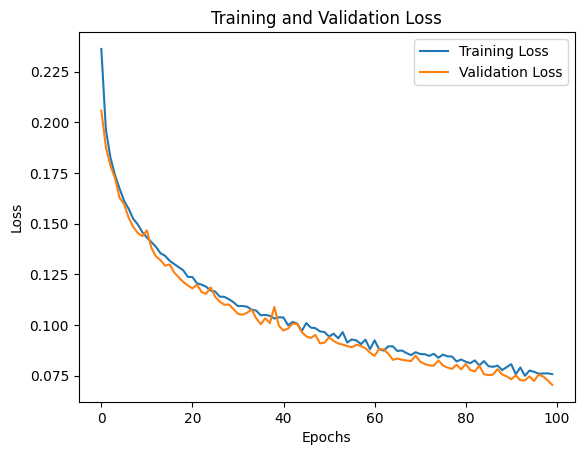

In [64]:
display_error_curves(mlp_lr4[1], mlp_lr4[2])

Based on Training with Different Epochs and Learning Rates the best model was with a learning rate of 1e-3 so we will use that model for testing.

In [93]:
ypred = []
yt = []

with torch.no_grad():

  total_mae = 0
  total_rmse = 0
  n = 0

  mae = torch.nn.L1Loss()
  mse = torch.nn.MSELoss()

  for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = mlp_lr3[0](X)

            ypred.append(ads.target_scaler.inverse_transform(pred.cpu().numpy()))
            yt.append(ads.target_scaler.inverse_transform(y.cpu().numpy()))


yptemp = torch.tensor([t[:, 0] for t in ypred[:-1]]).flatten()
ypwind = torch.tensor([t[:, 1] for t in ypred[:-1]]).flatten()

yttemp = torch.tensor([t[:, 0] for t in yt[:-1]]).flatten()
ytwind = torch.tensor([t[:, 1] for t in yt[:-1]]).flatten()

print("=== NN Results ===\n")
print("Air Temp")
print(f"Test RMSE: {root_mean_squared_error(yttemp, yptemp):.4f}")
print(f"Test R^2: {r2_score(yttemp, yptemp):.4f}")
print("Wind Speed")
print(f"Test RMSE: {root_mean_squared_error(ytwind, ypwind):.4f}")
print(f"Test R^2: {r2_score(ytwind, ypwind):.4f}")

=== NN Results ===

Air Temp
Test RMSE: 1.9579
Test R^2: 0.9931
Wind Speed
Test RMSE: 2.7127
Test R^2: 0.9613


In [94]:
yptemp = torch.tensor([t[:, 0] for t in ypred[:8]]).flatten()
ypwind = torch.tensor([t[:, 1] for t in ypred[:8]]).flatten()

yttemp = torch.tensor([t[:, 0] for t in yt[:8]]).flatten()
ytwind = torch.tensor([t[:, 1] for t in yt[:8]]).flatten()

yptemp.shape, yttemp.shape, ypwind.shape, ytwind.shape

(torch.Size([2048]),
 torch.Size([2048]),
 torch.Size([2048]),
 torch.Size([2048]))

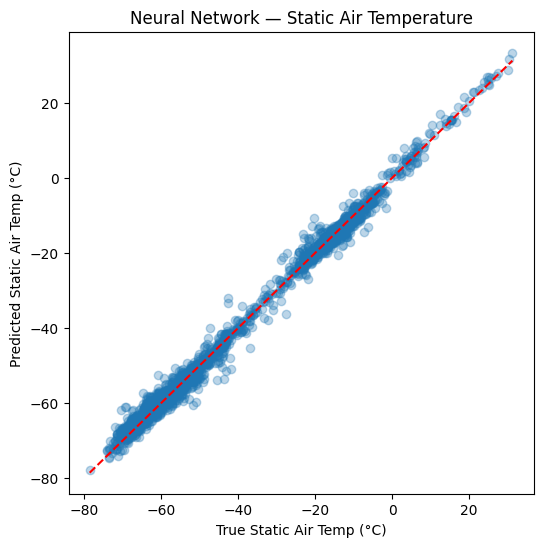

In [95]:

plt.figure(figsize=(6,6))
plt.scatter(yttemp, yptemp, alpha=0.3)
plt.xlabel("True Static Air Temp (°C)")
plt.ylabel("Predicted Static Air Temp (°C)")
plt.title("Neural Network — Static Air Temperature")
plt.plot([yttemp.min(), yttemp.max()],
         [yttemp.min(), yttemp.max()], 'r--')  # ideal line
plt.show()

Because the range of wind speed and air temp is around 100 an MAE and RMSE in this range indicates our model is doing quite well

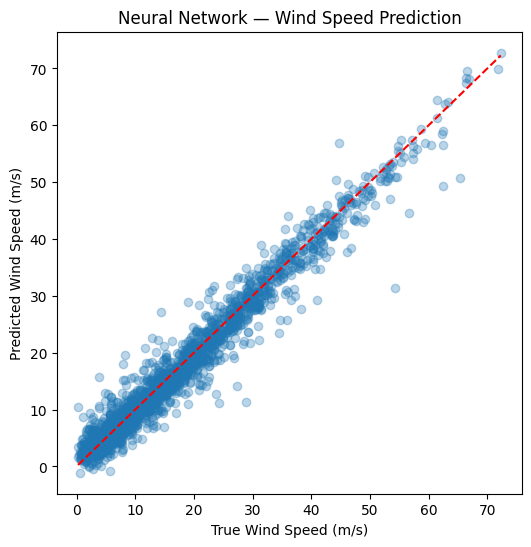

In [96]:
plt.figure(figsize=(6,6))
plt.scatter(ytwind, ypwind, alpha=0.3)
plt.xlabel("True Wind Speed (m/s)")
plt.ylabel("Predicted Wind Speed (m/s)")
plt.title("Neural Network — Wind Speed Prediction")

plt.plot(
    [ytwind.min(), ytwind.max()],
    [ytwind.min(), ytwind.max()],
    'r--'
)

plt.show()